In [1]:
# Работа с данными и визуализация
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Метрики и прочее для обучения моделей
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score, roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

# Модели
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

## Загрузка данных

In [3]:
df = pd.read_csv('Churn_Modelling.csv', sep = ';')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df['Geography_num'] = df['Geography']

d = {'France':0, 'Spain':1, 'Germany':2}
df['Geography_num'] = df['Geography_num'].map(d)
df['Gender']= df['Gender'].map({'Male':0, 'Female':1})
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_num
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0,1
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0,1
5,6,15574012,Chu,645,Spain,0,44,8,113755.78,2,1,0,149756.71,1,1
6,7,15592531,Bartlett,822,France,0,50,7,0.00,2,1,1,10062.80,0,0
7,8,15656148,Obinna,376,Germany,1,29,4,115046.74,4,1,0,119346.88,1,2
8,9,15792365,He,501,France,0,44,4,142051.07,2,0,1,74940.50,0,0
9,10,15592389,H?,684,France,0,27,2,134603.88,1,1,1,71725.73,0,0


In [5]:
features_names = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 
                  'IsActiveMember', 'EstimatedSalary']
geography_cols = pd.get_dummies(df["Geography"], dtype=int)
X = pd.concat([df[features_names], geography_cols], axis = 1)
# выделение целевой переменной (таргета) в отдельный вектор
y = df['Exited']
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,0,1,0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   France           10000 non-null  int32  
 10  Germany          10000 non-null  int32  
 11  Spain            10000 non-null  int32  
dtypes: float64(2), int32(3), int64(7)
memory usage: 820.4 KB


In [7]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


### Modelling

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(6700, 12) (3300, 12) (6700,) (3300,)


In [9]:
X_train

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
8371,813,1,29,5,106059.40,1,0,0,187976.88,0,1,0
5027,681,0,37,8,73179.34,2,1,1,25292.53,0,1,0
9234,642,0,49,4,120688.61,1,1,0,24770.22,0,1,0
3944,612,1,31,8,117989.76,1,1,1,54129.86,1,0,0
6862,586,0,33,9,0.00,1,1,0,6975.02,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,0,54,8,69712.74,1,1,1,69381.05,1,0,0
5191,682,1,58,1,0.00,1,1,1,706.50,1,0,0
5390,735,1,38,1,0.00,3,0,0,92220.12,1,0,0
860,667,0,43,8,190227.46,1,1,0,97508.04,1,0,0


In [10]:
X_test


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
6252,596,0,32,3,96709.07,2,0,0,41788.37,0,1,0
4684,623,0,43,1,0.00,2,1,1,146379.30,1,0,0
1731,601,1,44,4,0.00,2,1,0,58561.31,0,0,1
4742,506,0,59,8,119152.10,2,1,1,170679.74,0,1,0
4521,560,1,27,7,124995.98,1,1,1,114669.79,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1744,850,1,39,7,79259.99,1,0,1,186910.74,1,0,0
9754,673,0,40,1,121629.22,1,1,1,3258.60,0,0,1
6094,589,1,31,10,110635.32,1,1,0,148218.86,1,0,0
8781,438,0,60,7,78391.17,1,0,1,49424.60,1,0,0


### KNeighborsClassifier (Классификация ближайших соседей)

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# performance measurement
knn_pred_test = knn.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred_test)
knn_accuracy = accuracy_score(y_test, knn_pred_test)
knn_error_rate = 1 - knn_accuracy
knn_precision_score = precision_score(y_test, knn_pred_test)
knn_recall = recall_score(y_test, knn_pred_test)
knn_roc_auc_score = roc_auc_score(y_test, knn_pred_test, average='macro')

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print(classification_report(y_test, knn_pred_test))

train accuracy:  0.815820895522388
test accuracy:  0.769090909090909
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2657
           1       0.26      0.10      0.14       643

    accuracy                           0.77      3300
   macro avg       0.53      0.51      0.50      3300
weighted avg       0.70      0.77      0.73      3300



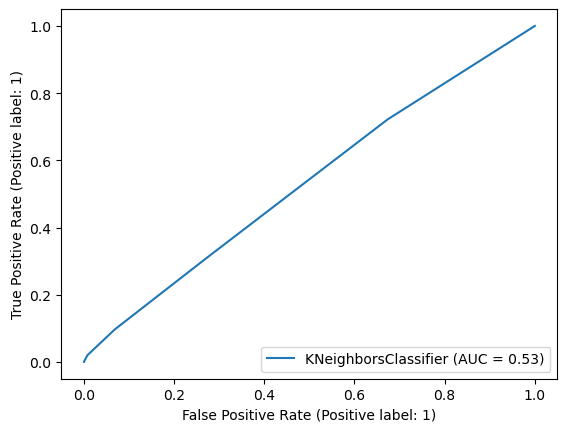

In [12]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

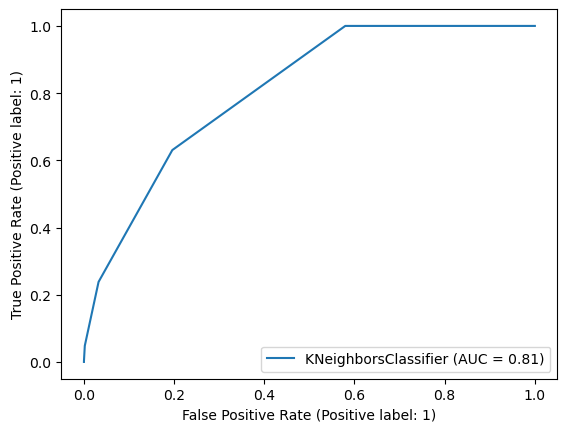

In [13]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

In [14]:
roc_auc_score(y_test, y_test_predict, average='macro')

0.5141505375337074

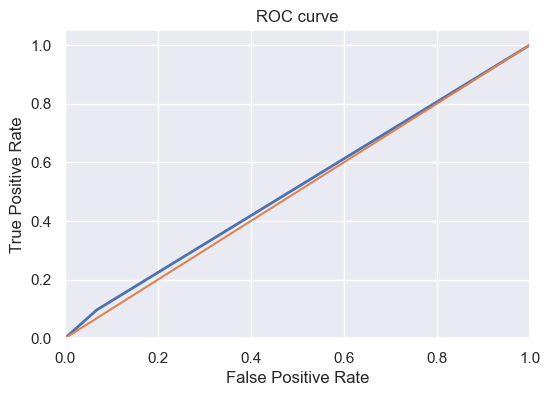

In [15]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [16]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [17]:
# performance measurement
gnb_pred_test = gnb.predict(X_test)
gnb_cm = confusion_matrix(y_test, gnb_pred_test)
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)
gnb_error_rate = 1 - gnb_accuracy
gnb_precision_score = precision_score(y_test, gnb_pred_test)
gnb_recall = recall_score(y_test, gnb_pred_test)
gnb_roc_auc_score = roc_auc_score(y_test, gnb_pred_test, average='macro')

y_train_predict = gnb.predict(X_train)
y_test_predict = gnb.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print(classification_report(y_test, gnb_pred_test))

train accuracy:  0.7829850746268656
test accuracy:  0.7951515151515152
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2657
           1       0.38      0.08      0.14       643

    accuracy                           0.80      3300
   macro avg       0.60      0.53      0.51      3300
weighted avg       0.73      0.80      0.74      3300



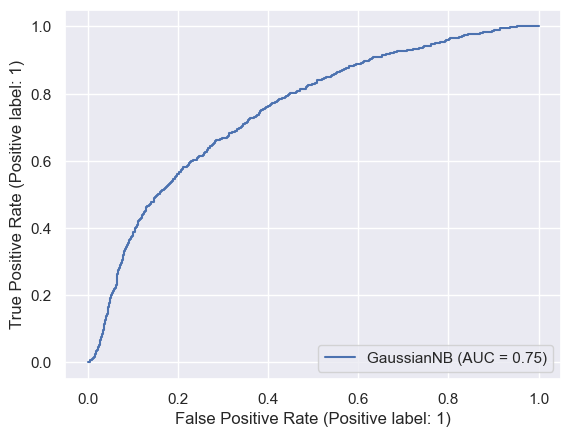

In [18]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

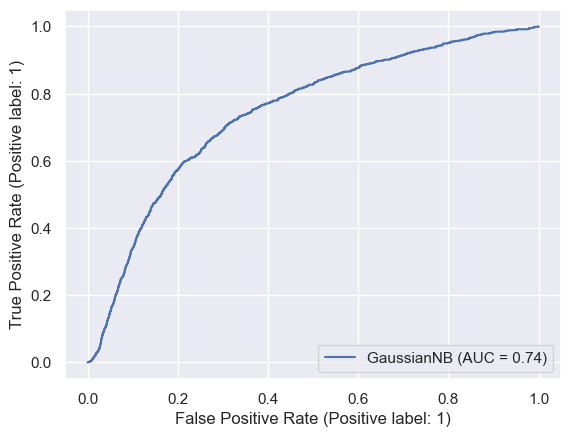

In [19]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

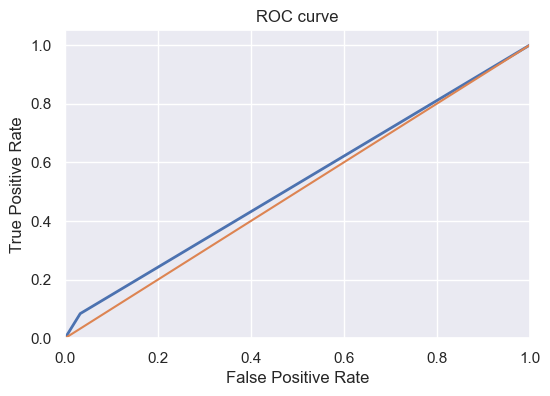

In [20]:
sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

### Random Forest Classifier (Классификатор дерева решений)

In [21]:
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)

# performance measurement
rfc_pred_test = rfc.predict(X_test)
rfc_cm = confusion_matrix(y_test, rfc_pred_test)
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)
rfc_error_rate = 1 - rfc_accuracy
rfc_precision_score = precision_score(y_test, rfc_pred_test)
rfc_recall = recall_score(y_test, rfc_pred_test)
rfc_roc_auc_score = roc_auc_score(y_test, rfc_pred_test, average='macro')

y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print(classification_report(y_test, rfc_pred_test))

train accuracy:  0.8916417910447761
test accuracy:  0.8712121212121212
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.80      0.45      0.58       643

    accuracy                           0.87      3300
   macro avg       0.84      0.71      0.75      3300
weighted avg       0.86      0.87      0.86      3300



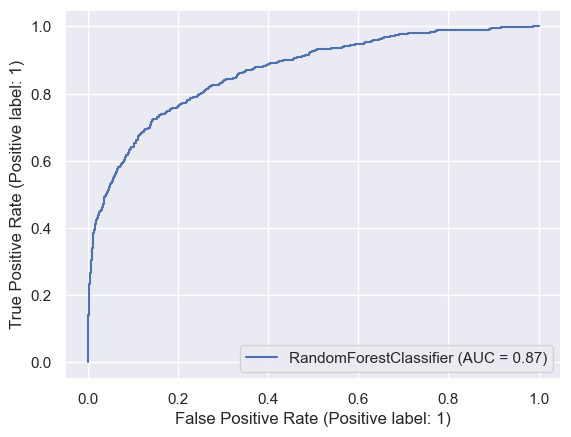

In [22]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

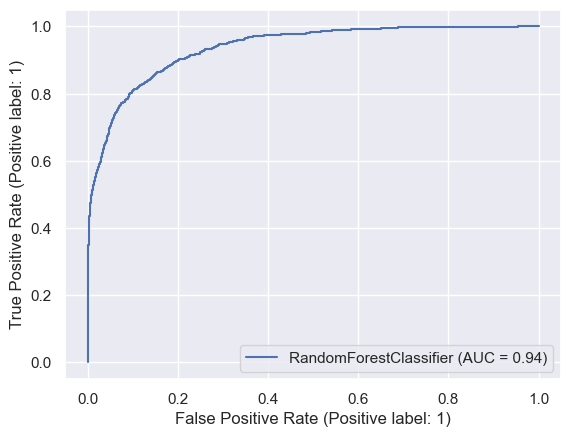

In [23]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_train, y_train)

### Logistic Regression (Логистическая регрессия)

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

# performance measurement
lr_pred_test = lr.predict(X_test)
lr_cm = confusion_matrix(y_test, lr_pred_test)
lr_accuracy = accuracy_score(y_test, lr_pred_test)
lr_error_rate = 1 - lr_accuracy
lr_precision_score = precision_score(y_test, lr_pred_test)
lr_recall = recall_score(y_test, lr_pred_test)
lr_roc_auc_score = roc_auc_score(y_test, lr_pred_test, average='macro')

y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))
print(classification_report(y_test, lr_pred_test))

train accuracy:  0.8097014925373134
test accuracy:  0.8115151515151515
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2657
           1       0.54      0.21      0.30       643

    accuracy                           0.81      3300
   macro avg       0.69      0.58      0.60      3300
weighted avg       0.78      0.81      0.78      3300



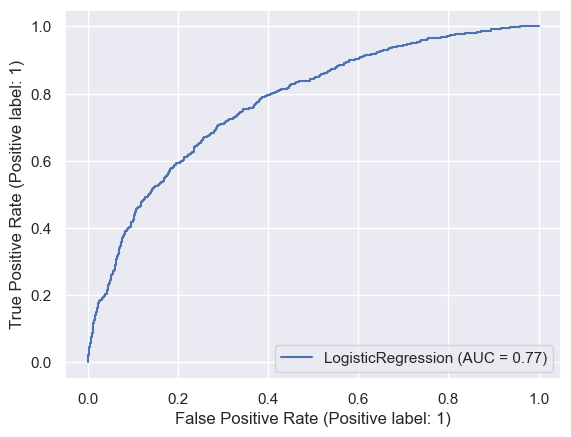

In [25]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)

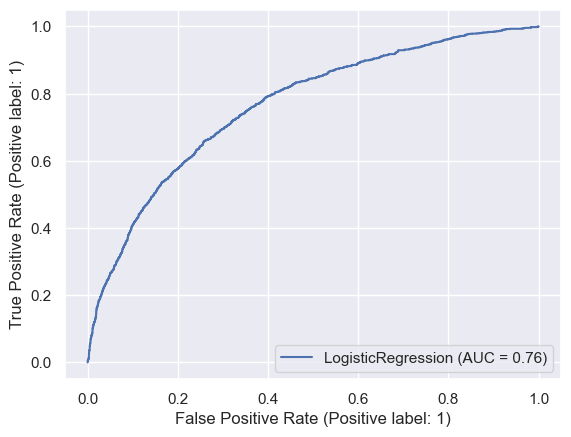

In [26]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_train, y_train)

## Метрики классификации

In [27]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [28]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy", "Error Rate", "Precision", "Recall"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]
log["Error Rate"] = [knn_error_rate, gnb_error_rate, rfc_error_rate, lr_error_rate]
log["Precision"] = [knn_precision_score, gnb_precision_score, rfc_precision_score, lr_precision_score,]
log["Recall"] = [knn_recall, gnb_recall, rfc_recall, lr_recall]

log

,Classifier,Accuracy,Error Rate,Precision,Recall
0,KNeighborsClassifier,0.769091,0.230909,0.255144,0.096423
1,Gaussian Naive Bayes,0.795152,0.204848,0.382979,0.083981
2,Random Forest Classifier,0.871212,0.128788,0.804469,0.447900
3,Logistic Regression,0.811515,0.188485,0.542857,0.206843


In [29]:
log

,Classifier,Accuracy,Error Rate,Precision,Recall
0,KNeighborsClassifier,0.769091,0.230909,0.255144,0.096423
1,Gaussian Naive Bayes,0.795152,0.204848,0.382979,0.083981
2,Random Forest Classifier,0.871212,0.128788,0.804469,0.447900
3,Logistic Regression,0.811515,0.188485,0.542857,0.206843


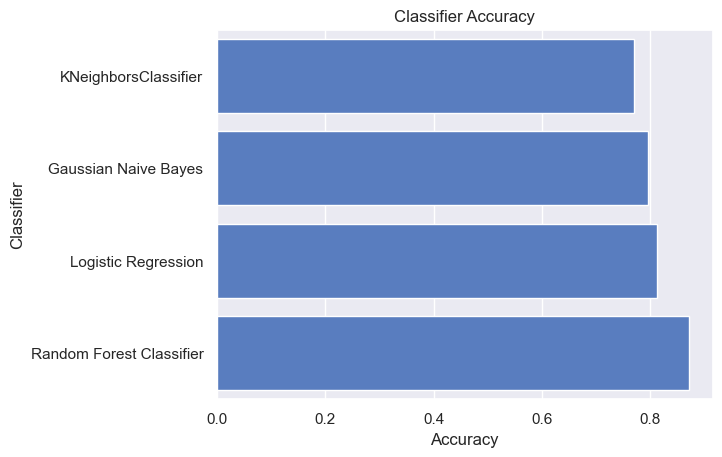

In [30]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

Самая лучшая модел для обучения оказалась Random Forest Classifier, из это следует что у нее самый низкий Error Rate, затем идёт Logistic Regression и Gaussian Naive Bayes